In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
routes = pd.read_csv("Data/routes.txt")

In [3]:
# print(routes["route_short_name"].unique())
rapid_routes_list = ['A Line', 'B Line', 'C Line', 'D Line', 'E Line', 'F Line', 'H Line']
rapid_routes = routes[routes['route_short_name'].isin(rapid_routes_list)][["route_id", "route_short_name", "route_desc"]]
rapid_routes

,route_id,route_short_name,route_desc
97,100512,A Line,Federal Way - SeaTac - Tukwila Intl Blvd Sta
98,102548,B Line,Redmond TC - Overlake TC - Bellevue TC
105,102576,C Line,Westwood Village - Downtown Seattle
106,102581,D Line,Blue Ridge/Crown Hill - Ballard - Downtown Sea...
108,102615,E Line,Aurora Village Transit Center - Downtown Seattle
109,102619,F Line,Burien TC - Tukwila Intl Blvd Sta - Renton Lan...
132,102736,H Line,Burien TC - Westwood Village - Downtown Seattle


In [4]:

stops = pd.read_csv("Data/stops.txt")
stops.head()


,stop_id,stop_code,stop_name,tts_stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
0,100,100,1st Ave & Spring St,First Avenue and Spring Street,NaN,47.605137,-122.336533,21,NaN,0,NaN,America/Los_Angeles,1
1,10005,10005,40th Ave NE & NE 51st St,40th Avenue Northeast and Northeast 51st Street,NaN,47.665886,-122.284897,1,NaN,0,NaN,America/Los_Angeles,1
2,10010,10010,NE 55th St & 39th Ave NE,Northeast 55th Street and 39th Avenue Northeast,NaN,47.668579,-122.285667,1,NaN,0,NaN,America/Los_Angeles,1
3,10020,10020,NE 55th St & 37th Ave NE,Northeast 55th Street and 37th Avenue Northeast,NaN,47.668579,-122.288300,1,NaN,0,NaN,America/Los_Angeles,1
4,10030,10030,NE 55th St & 35th Ave NE,Northeast 55th Street and 35th Avenue Northeast,NaN,47.668579,-122.290512,1,NaN,0,NaN,America/Los_Angeles,1


In [5]:
rapid_stops = pd.merge(rapid_routes, stops, left_on='route_id', right_on='stop_id', how='inner')
rapid_stops.head()

,route_id,route_short_name,route_desc,stop_id,stop_code,stop_name,tts_stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding


In [6]:
A = [85538, 60800, 60900, 60921]
B = [72476, 71961, 73240, 68398, 68003]
C = [22557, 19670, 19862, 558, 10325]
D = [28680, 13721, 2672, 431, 1710]
E = [16100, 6950, 7160, 75408, 510]
F = [52306, 60922, 59310, 59882, 46477, 46504]
G = [120, 125, 100, 105, 110]
H = [52303, 51520, 31731, 21450, 548, 600]

rapid_ride_stops = [A, B, C, D, E, F, G, H]
route_names = ['A Line', 'B Line', 'C Line', 'D Line', 'E Line', 'F Line', 'G Line', 'H Line']
colors = {'A Line': 'red',
          'B Line': 'blue',
          'C Line': 'green',
          'D Line': 'purple',
          'E Line': 'orange',
          'F Line': 'brown',
          'G Line': 'pink',
          'H Line': 'gray'}

In [7]:
def define_routes(stop_ids, route_name):
    df = pd.DataFrame()
    for i in range(len(route_name)):
        stop = stop_ids[i]
        stop_info = stops[stops['stop_id'].isin(stop)]
        stop_info['route_name'] = route_name[i]
        df = pd.concat([df, stop_info], ignore_index=True)
    return df
rapid_routes = define_routes(rapid_ride_stops, route_names)
rapid_routes.head()

C:\Users\turne\AppData\Local\Temp\ipykernel_23708\1192320459.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_info['route_name'] = route_name[i]
C:\Users\turne\AppData\Local\Temp\ipykernel_23708\1192320459.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_info['route_name'] = route_name[i]
C:\Users\turne\AppData\Local\Temp\ipykernel_23708\1192320459.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,stop_id,stop_code,stop_name,tts_stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding,route_name
0,60800,60800,Pacific Hwy S & Kent Des Moines Rd,Pacific Highway South and Kent Des Moines Road,NaN,47.394741,-122.294678,24,NaN,0,NaN,America/Los_Angeles,1,A Line
1,60900,60900,International Blvd & S 176th St - Bay 2,International Boulevard and South One Hundred ...,NaN,47.445816,-122.296127,24,NaN,0,NaN,America/Los_Angeles,1,A Line
2,60921,60921,Tukwila International Blvd Station - Bay 1,Tukwila International Boulevard Station - Bay One,NaN,47.464207,-122.288452,79,NaN,0,NaN,America/Los_Angeles,1,A Line
3,85538,85538,Federal Way Downtown Station - Bay 8,Federal Way Downtown Station - Bay eight,NaN,47.316677,-122.303558,24,NaN,0,NaN,America/Los_Angeles,0,A Line
4,68003,68003,Bellevue Transit Center - Bay 3,Bellevue Transit Center - Bay Three,NaN,47.615505,-122.195358,19,NaN,0,NaN,America/Los_Angeles,1,B Line


In [8]:
geometry = gpd.points_from_xy(rapid_routes.stop_lon, rapid_routes.stop_lat)
rapid_routes_gdf = gpd.GeoDataFrame(rapid_routes, geometry=geometry, crs="EPSG:4326")
rapid_routes_gdf.head()

,stop_id,stop_code,stop_name,tts_stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding,route_name,geometry
0,60800,60800,Pacific Hwy S & Kent Des Moines Rd,Pacific Highway South and Kent Des Moines Road,NaN,47.394741,-122.294678,24,NaN,0,NaN,America/Los_Angeles,1,A Line,POINT (-122.29 47.395)
1,60900,60900,International Blvd & S 176th St - Bay 2,International Boulevard and South One Hundred ...,NaN,47.445816,-122.296127,24,NaN,0,NaN,America/Los_Angeles,1,A Line,POINT (-122.3 47.446)
2,60921,60921,Tukwila International Blvd Station - Bay 1,Tukwila International Boulevard Station - Bay One,NaN,47.464207,-122.288452,79,NaN,0,NaN,America/Los_Angeles,1,A Line,POINT (-122.29 47.464)
3,85538,85538,Federal Way Downtown Station - Bay 8,Federal Way Downtown Station - Bay eight,NaN,47.316677,-122.303558,24,NaN,0,NaN,America/Los_Angeles,0,A Line,POINT (-122.3 47.317)
4,68003,68003,Bellevue Transit Center - Bay 3,Bellevue Transit Center - Bay Three,NaN,47.615505,-122.195358,19,NaN,0,NaN,America/Los_Angeles,1,B Line,POINT (-122.2 47.616)


<Axes: >

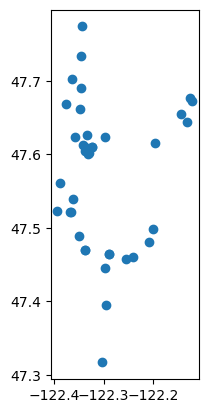

In [9]:
rapid_routes_gdf.plot()

In [10]:
import folium
import matplotlib.pyplot as plt
print(rapid_routes_gdf["stop_lat"].dtype)
m = folium.Map(location=[47.6061, -122.3328], tiles='Cartodb dark_matter', zoom_start=9)
for index, row in rapid_routes_gdf.iterrows():
    folium.Marker(
        location=[row['stop_lat'], row['stop_lon']],
        popup=f"Route: {row['route_name']}<br>Stop: {row['stop_name']}",
        icon=folium.Icon(color=colors[row['route_name']], icon='info-sign')
    ).add_to(m)
    folium.Circle(
        location=[row['stop_lat'], row['stop_lon']],
        radius=1000,
        color=colors[row['route_name']],
        fill=True,
        fill_color=colors[row['route_name']]
    ).add_to(m)
m


float64


C:\Users\turne\AppData\Local\Temp\ipykernel_23708\2160627084.py:9: UserWarning: color argument of Icon should be one of: {'darkblue', 'blue', 'beige', 'darkred', 'lightblue', 'pink', 'red', 'lightgray', 'purple', 'black', 'lightgreen', 'lightred', 'cadetblue', 'green', 'gray', 'white', 'darkpurple', 'orange', 'darkgreen'}.
  icon=folium.Icon(color=colors[row['route_name']], icon='info-sign')


In [11]:
rapid_routes_gdf.to_file("Data/rapid_routes.geojson", driver="GeoJSON")

In [12]:
transit = gpd.read_file("Data/king_transit.geojson")

In [13]:
route_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
rapid_ride_route = transit[transit['ROUTE_LIST'].str.contains(r'(^|[\s])([A-H])(\b|[\s])', case=False, na=False)]
rapid_ride_route = rapid_ride_route[rapid_ride_route["STOP_STATUS"] == "ACT"]
rapid_ride_route = rapid_ride_route[['ROUTE_LIST', 'XCOORD', 'YCOORD', 'geometry']]

def label_line(row):
    print(row["ROUTE_LIST"])
    for route in route_names:
        if route in row["ROUTE_LIST"]:
            return f"{route} Line"
    return "Other"

rapid_ride_route['RAPID_LINE'] = rapid_ride_route.apply(label_line, axis=1)
rapid_ride_route.head()

F
F
50 773 C
H
A
H
906 F
F
A
F
F
F
F
128 F
F
F
153 F
H
H
H
161 F
161 F
H
H
153 F
H
H
H
H
H
161 F
H
161 165 F
150 F
150 F
H
H
H
C
22 H
H
H
H
161 165 F
C
H
H
H
161 165 631 F
H
131 132 F H
161 631 F
161 165 F
101 106 107N 160 F
H
107 148 F
240 F
22 H
F
F
C
161 F
161 F
240 566E F
F
165 A
906 F
150 F
906 F
150 F
101 106 107 160 F
F
F
F
F
F
131 132 21 28E 5 E
22 H
E
113 H
125 22 60 H
H
G
G
2 G
G
G
G
G
12 G
G
C
E
E
E
11 8 G
11 8 988EN G
11 8 988EN G
161 165 631 F
50 C
40 D
40 D
113 H
113 H
21 C
21 C
21 21E C
1 13 2 8 D
28E 5 E
28E 5 E
28E 5 E
124 131 132 13N 14 17EN 1N 2 21 21E 24N 27 33N 4 40N 56 57 62N C DN EN H
21 21E 56 57 C DN EN
124 125 131 132 24N 27 33N H
28E 5 E
50 773 C
24 32 33 D
17E 24 32 33 D
32 D
D
32 D
32 D
32 D
32 D
H
21 22 C
E
E
E
E
E
D
D
D
D
17E D
D
D
D
303 331 E
303 331 E
40 D
40 D
28E 5 E
28E 5 E
E
E
E
E
G
G
50 C
12 G
G
G
G
G
G
G
1 13 2 32N 8 D
C
C
C
C
1 125N 13 14N 2 3 36 4 70 7N C D E
1 124N 13 131N 132N 14 17E 2 21E 24 28E 3 33 4 40 5 62 C D E H
1 124 13 131 132 17E 2 2

C:\Users\turne\AppData\Local\Temp\ipykernel_23708\3874274470.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  rapid_ride_route = transit[transit['ROUTE_LIST'].str.contains(r'(^|[\s])([A-H])(\b|[\s])', case=False, na=False)]


,ROUTE_LIST,XCOORD,YCOORD,geometry,RAPID_LINE
3,F,1288886.1,170220.7,POINT (-122.25 47.458),F Line
7,F,1288892.7,170571.0,POINT (-122.25 47.459),F Line
17,50 773 C,1258446.5,208506.0,POINT (-122.38 47.561),C Line
167,H,1263130.7,198750.1,POINT (-122.36 47.535),H Line
426,A,1279753.3,171276.2,POINT (-122.29 47.46),A Line


In [14]:
rapid_ride_route['x'] = rapid_ride_route.get_coordinates()['x']
rapid_ride_route['y'] = rapid_ride_route.get_coordinates()['y']
rapid_ride_route.head()

print(rapid_ride_route["ROUTE_LIST"].unique())


['F' '50 773 C' 'H' 'A' '906 F' '128 F' '153 F' '161 F' '161 165 F'
 '150 F' 'C' '22 H' '161 165 631 F' '131 132 F H' '161 631 F'
 '101 106 107N 160 F' '107 148 F' '240 F' '240 566E F' '165 A'
 '101 106 107 160 F' '131 132 21 28E 5 E' 'E' '113 H' '125 22 60 H' 'G'
 '2 G' '12 G' '11 8 G' '11 8 988EN G' '50 C' '40 D' '21 C' '21 21E C'
 '1 13 2 8 D' '28E 5 E'
 '124 131 132 13N 14 17EN 1N 2 21 21E 24N 27 33N 4 40N 56 57 62N C DN EN H'
 '21 21E 56 57 C DN EN' '124 125 131 132 24N 27 33N H' '24 32 33 D'
 '17E 24 32 33 D' '32 D' 'D' '21 22 C' '17E D' '303 331 E'
 '1 13 2 32N 8 D' '1 125N 13 14N 2 3 36 4 70 7N C D E'
 '1 124N 13 131N 132N 14 17E 2 21E 24 28E 3 33 4 40 5 62 C D E H'
 '1 124 13 131 132 17E 2 24 28E 33 4 5 D E' '40 C' '40 98N C' '21 773 C'
 '128 22 773 C' '62 E' '125 50 H' '1 13 14N 2N 3 36N 4 70 7N D E' '125 C'
 '1 125 13 14N 2N 3 36N 4 70 7N C D E' '125 21E 56 57 C H'
 '124 131 132 13N 14 17E 1N 21 24 2N 33 36 3N 40 49N 4N 7 70N D'
 '21 21E 50 773N C' '1 32 8 D'
 '124 125 131 1

In [15]:
from folium.plugins import HeatMap

m = folium.Map(location=[47.6061, -122.3328], tiles='Cartodb dark_matter', zoom_start=9)

for index, row in rapid_ride_route.iterrows():
    # folium.Marker(
    #     location=[row['y'], row['x']],
    #     popup=f"Route: {row['ROUTE_LIST']}<br>Stop: {row['RAPID_LINE']}",
    #     icon=folium.Icon(color=colors[row['RAPID_LINE']], icon='info-sign')
    # ).add_to(m)
    folium.Circle(
        location=[row['y'], row['x']],
        radius=1000,
        color=colors[row['RAPID_LINE']],
        fill=True,
        fill_color=colors[row['RAPID_LINE']]
    ).add_to(m)
m.save("stops_rapid_ride.html")

In [16]:
m2 = folium.Map(location=[47.6061, -122.3328], tiles='Cartodb dark_matter', zoom_start=9)

HeatMap(data=rapid_ride_route[['y', 'x']].values, radius=15).add_to(m2)

m2.save("heatmap_rapid_ride.html")

In [ ]:
rapid_ride_route.to_file("Data/rapid_ride_stops.geojson", driver="GeoJSON")

: 